This notebook contains 3 analyses for reversal session of mice:

1. Block Split Analysis on reversal data

    - [Supplementary] transition plots

    - [Figure 4] meal accuracy

    - [Figure 4] average first meal time by block
    
    - [Figure 4] average first meal time by block normalized by block duration

2. Learn Score

    - [Figure 3] learn score by action proportion in each block

    - [Figure 3] learn result at the last 25% data in each block

3. Pellet Retrieval Time

    - [Supplementary] Both reversal and FR1 pellet retrieval time
    
    - [Supplementary] Regression study on Block retrieval time in reversal session

### Transition Plots

In [1]:
import sys
sys.path.insert(0, '../scripts')

import numpy as np
import direction_transition as dit
from meals import find_meals_paper, find_first_good_meal
from accuracy import graph_group_stats
from preprocessing import read_excel_by_sheet
from path import *
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
  
spl_root = '../export/Supplementary/CASK_Transitions'
export_root = '../export/Figure 4'
import os
os.makedirs(export_root, exist_ok=True)
os.makedirs(spl_root, exist_ok=True)
time_threshold = 60
pellet_count_threshold = 2

ctrl_block_fir_meal, exp_block_fir_meal = [], []
ctrl_block_fir_meal_prop, exp_block_fir_meal_prop = [], []
ctrl_meal_avg_acc, exp_meal_avg_acc = [], []
ctrl_n_blocks, exp_n_blocks = [], []

In [2]:
for sheet in rev_ctrl_sheets[:]:
  temp_prop = []
  temp_acc = []
  meals = []
  
  data = read_excel_by_sheet(sheet, rev_ctrl_path, cumulative_accuracy=False)  
  blocks = dit.split_data_to_blocks(data)

  for block in blocks:
    meal, meal_acc = find_meals_paper(block,
                                      time_threshold=time_threshold, 
                                      pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_acc.extend(meal_acc)
    
  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=False)
  ctrl_n_blocks.append(len(blocks))
  avg_ratio, avg_time, avg_good_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  ctrl_block_fir_meal.append(avg_good_time)
  ctrl_meal_avg_acc.append(np.mean(temp_acc))
  ctrl_block_fir_meal_prop.append(avg_ratio)
  
  # dit.graph_tranition_stats(data_stats, blocks, sheet, export_path=os.path.join(spl_root, f'ctrl_{sheet}_transitions.svg'))

In [3]:
for sheet in rev_cask_sheets:
  temp_prop = []
  temp_acc = []
  meals = [] 
  
  data = read_excel_by_sheet(sheet, rev_cask_path, cumulative_accuracy=False)  
  blocks = dit.split_data_to_blocks(data)
  
  for block in blocks:
    meal, meal_acc = find_meals_paper(block,
                                      time_threshold=time_threshold, 
                                      pellet_threshold=pellet_count_threshold)
    meals.extend(meal)
    temp_acc.extend(meal_acc)

  data_stats = dit.get_transition_info(blocks, [time_threshold, pellet_count_threshold], reverse=False)
  exp_n_blocks.append(len(blocks))
  avg_ratio, avg_time, avg_good_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
  exp_block_fir_meal.append(avg_good_time)
  exp_meal_avg_acc.append(np.mean(temp_acc))
  exp_block_fir_meal_prop.append(avg_ratio)
  
  # dit.graph_tranition_stats(data_stats, blocks, sheet, export_path=os.path.join(spl_root, f'cask_{sheet}_transitions.svg'))

Ctrl Size: 26
CASK Size: 24
Ctrl Average: 23.692
CASK Average: 27.542
Ctrl SE: 0.580
CASK SE: 0.705


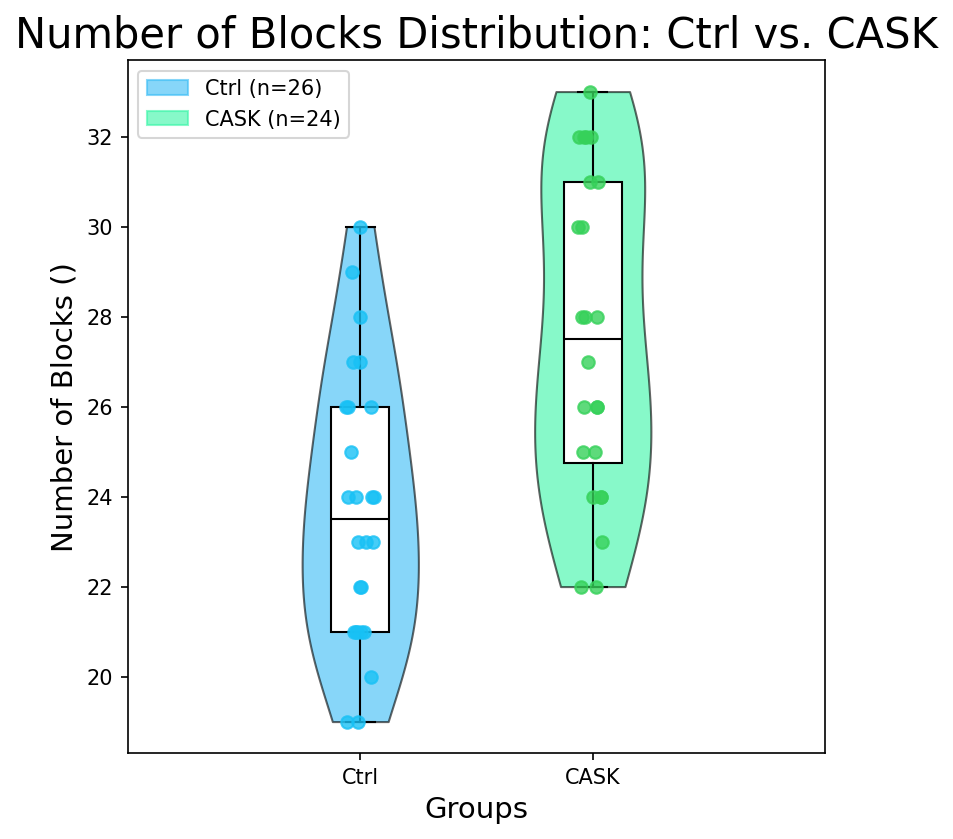

In [4]:
graph_group_stats(ctrl_n_blocks, exp_n_blocks, 
                  stats_name='Number of Blocks', unit='', group_names=['Ctrl', 'CASK'], 
                  export_path=os.path.join(export_root, 'CASK_number_of_blocks.svg'))

In [4]:
perform_T_test(ctrl_block_fir_meal, exp_block_fir_meal, test_side='two-sided')

P Value is  0.9210694260156895
There is no significant difference between the two groups.


Ctrl Size: 26
CASK Size: 24
Ctrl Average: 47.296
CASK Average: 46.687
Ctrl SE: 4.367
CASK SE: 4.062


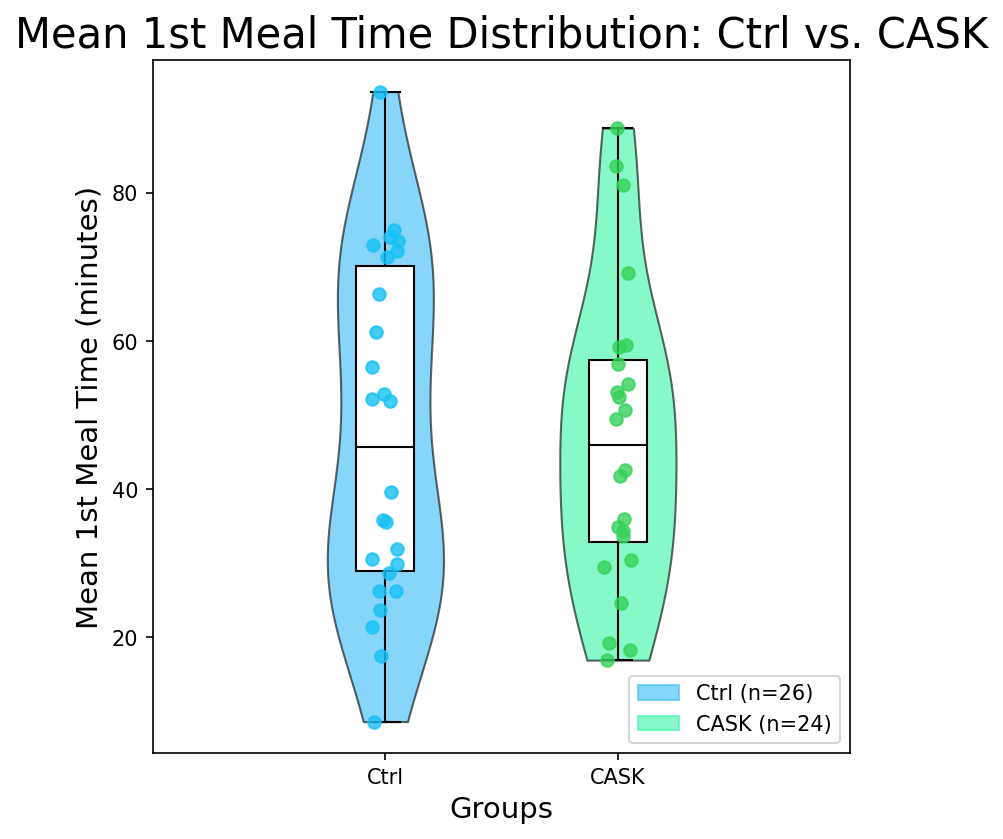

In [5]:
graph_group_stats(ctrl_block_fir_meal, exp_block_fir_meal, 
                  stats_name='Mean 1st Meal Time', unit='minutes', group_names=['Ctrl', 'CASK'], 
                  export_path=os.path.join(export_root, 'CASK_1st_meal_absolute_time.svg'))

In [6]:
perform_T_test(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, test_side='two-sided')

P Value is  0.005067956376992531
There is a significant difference between the two groups.


Ctrl Size: 26
CASK Size: 24
Ctrl Average: 0.391
CASK Average: 0.476
Ctrl SE: 0.018
CASK SE: 0.022


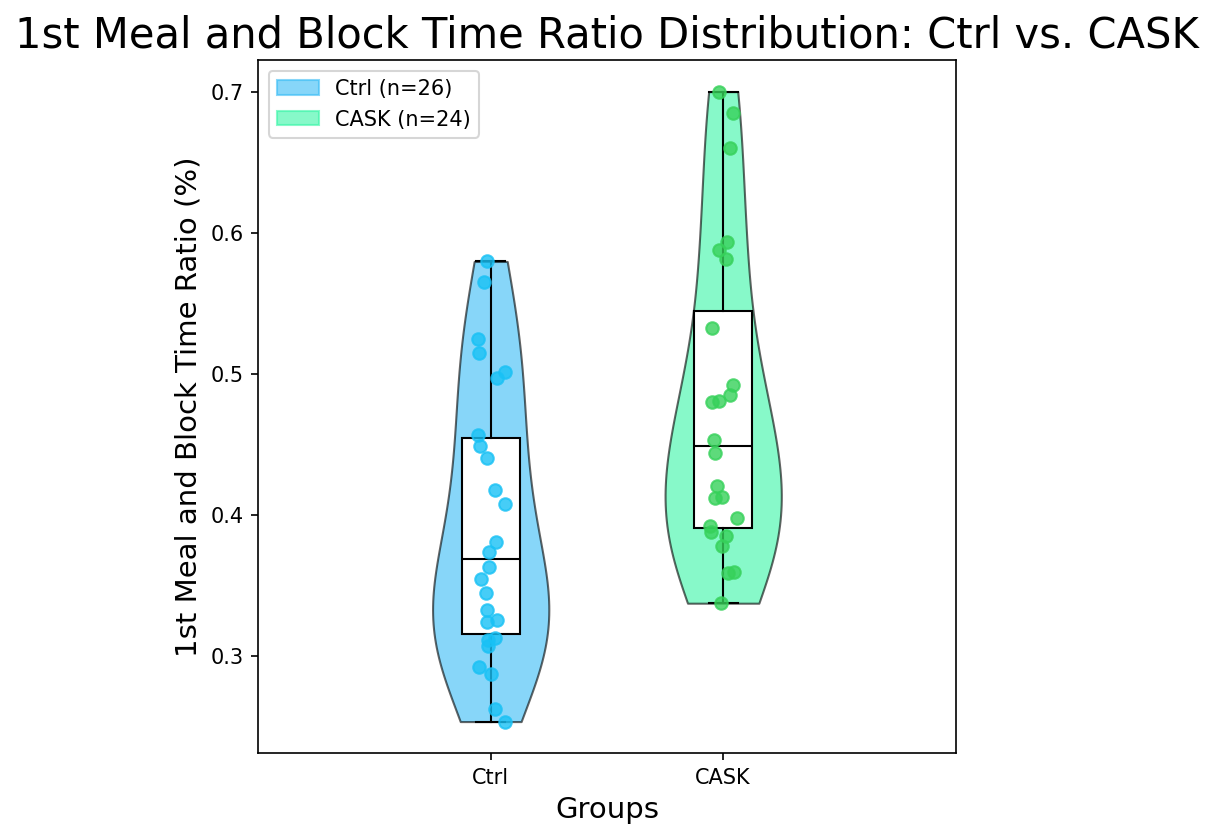

In [6]:
graph_group_stats(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, 
                  unit='%', stats_name='1st Meal and Block Time Ratio', group_names=['Ctrl', 'CASK'],
                  export_path=os.path.join(export_root, 'CASK_1st_meal_normalized.svg'))

In [7]:
perform_T_test(ctrl_meal_avg_acc, exp_meal_avg_acc, test_side='two-sided')

P Value is  0.08988540569833883
There is no significant difference between the two groups.


Ctrl Size: 26
CASK Size: 24
Ctrl Average: 86.962
CASK Average: 85.265
Ctrl SE: 0.504
CASK SE: 0.837


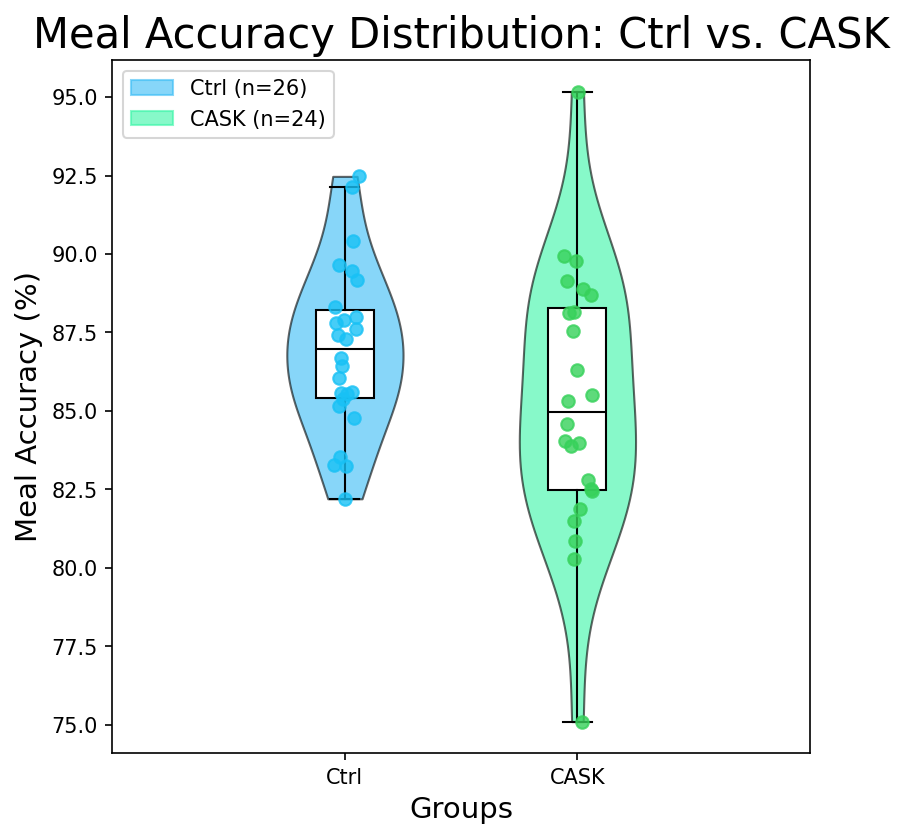

In [8]:
graph_group_stats(ctrl_meal_avg_acc, exp_meal_avg_acc,
                  unit='%', stats_name='Meal Accuracy', group_names=['Ctrl', 'CASK'],
                  export_path=os.path.join(export_root, 'CASK_meal_accuracy.svg'))

### Learning Score

In [3]:
action_prop = 0.75
block_prop = 0.6
meal_config=[60, 2]
day = 3

ctrl_learning_result, cask_learning_result = [], []
ctrl_scores, cask_scores = [], []
ctrl_blocks_lists, cask_blocks_lists = [], []

In [4]:
for sheet in rev_ctrl_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_ctrl_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    ctrl_blocks_lists.append(blocks)
    ctrl_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

for sheet in rev_cask_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_cask_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    cask_blocks_lists.append(blocks)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    cask_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

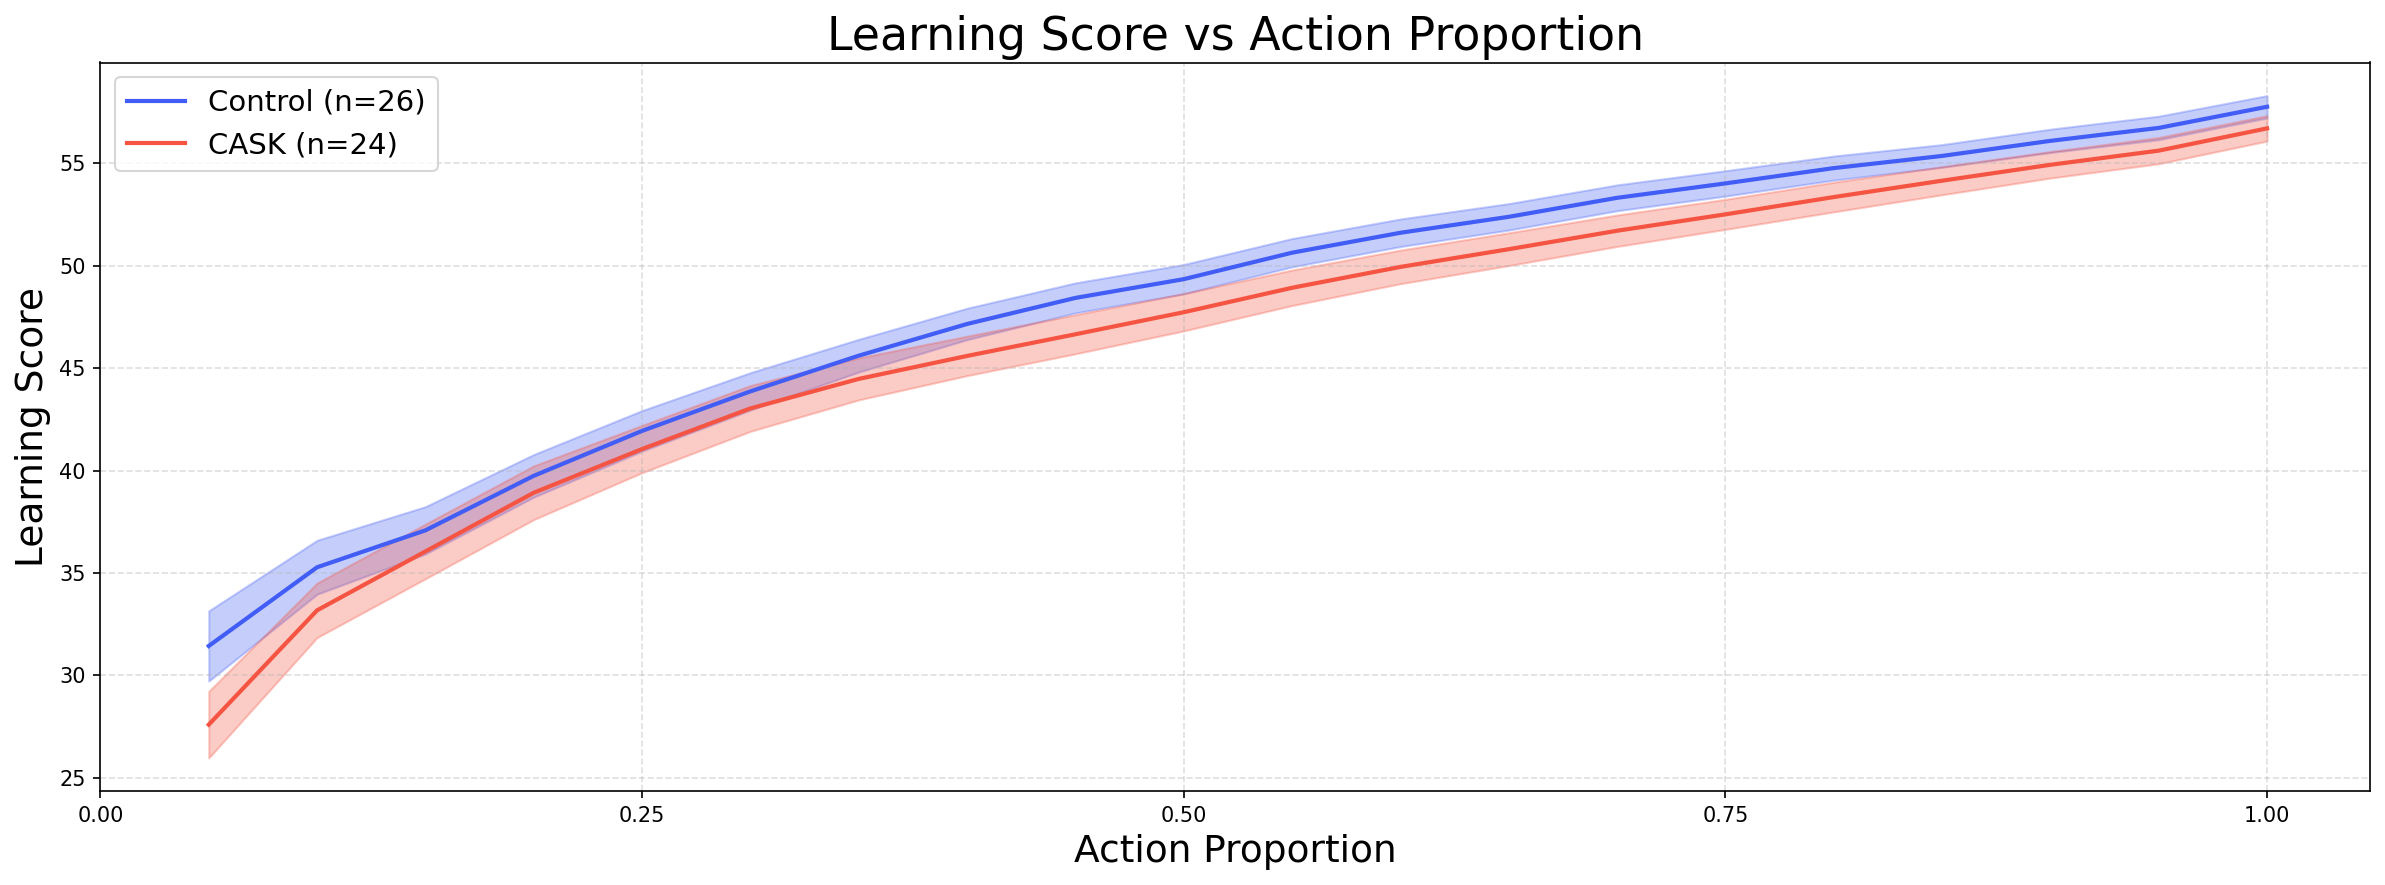

In [5]:
os.makedirs('../export/Figure 3', exist_ok=True)
dit.plot_learning_score_trend(
    blocks_groups=[ctrl_blocks_lists, cask_blocks_lists],
    group_labels=["Control", "CASK"],
    export_path="../export/Figure 3/CASK_learning_score_trend.svg"
)

Female Size: 20   Avg: 0.898   SE: 0.007


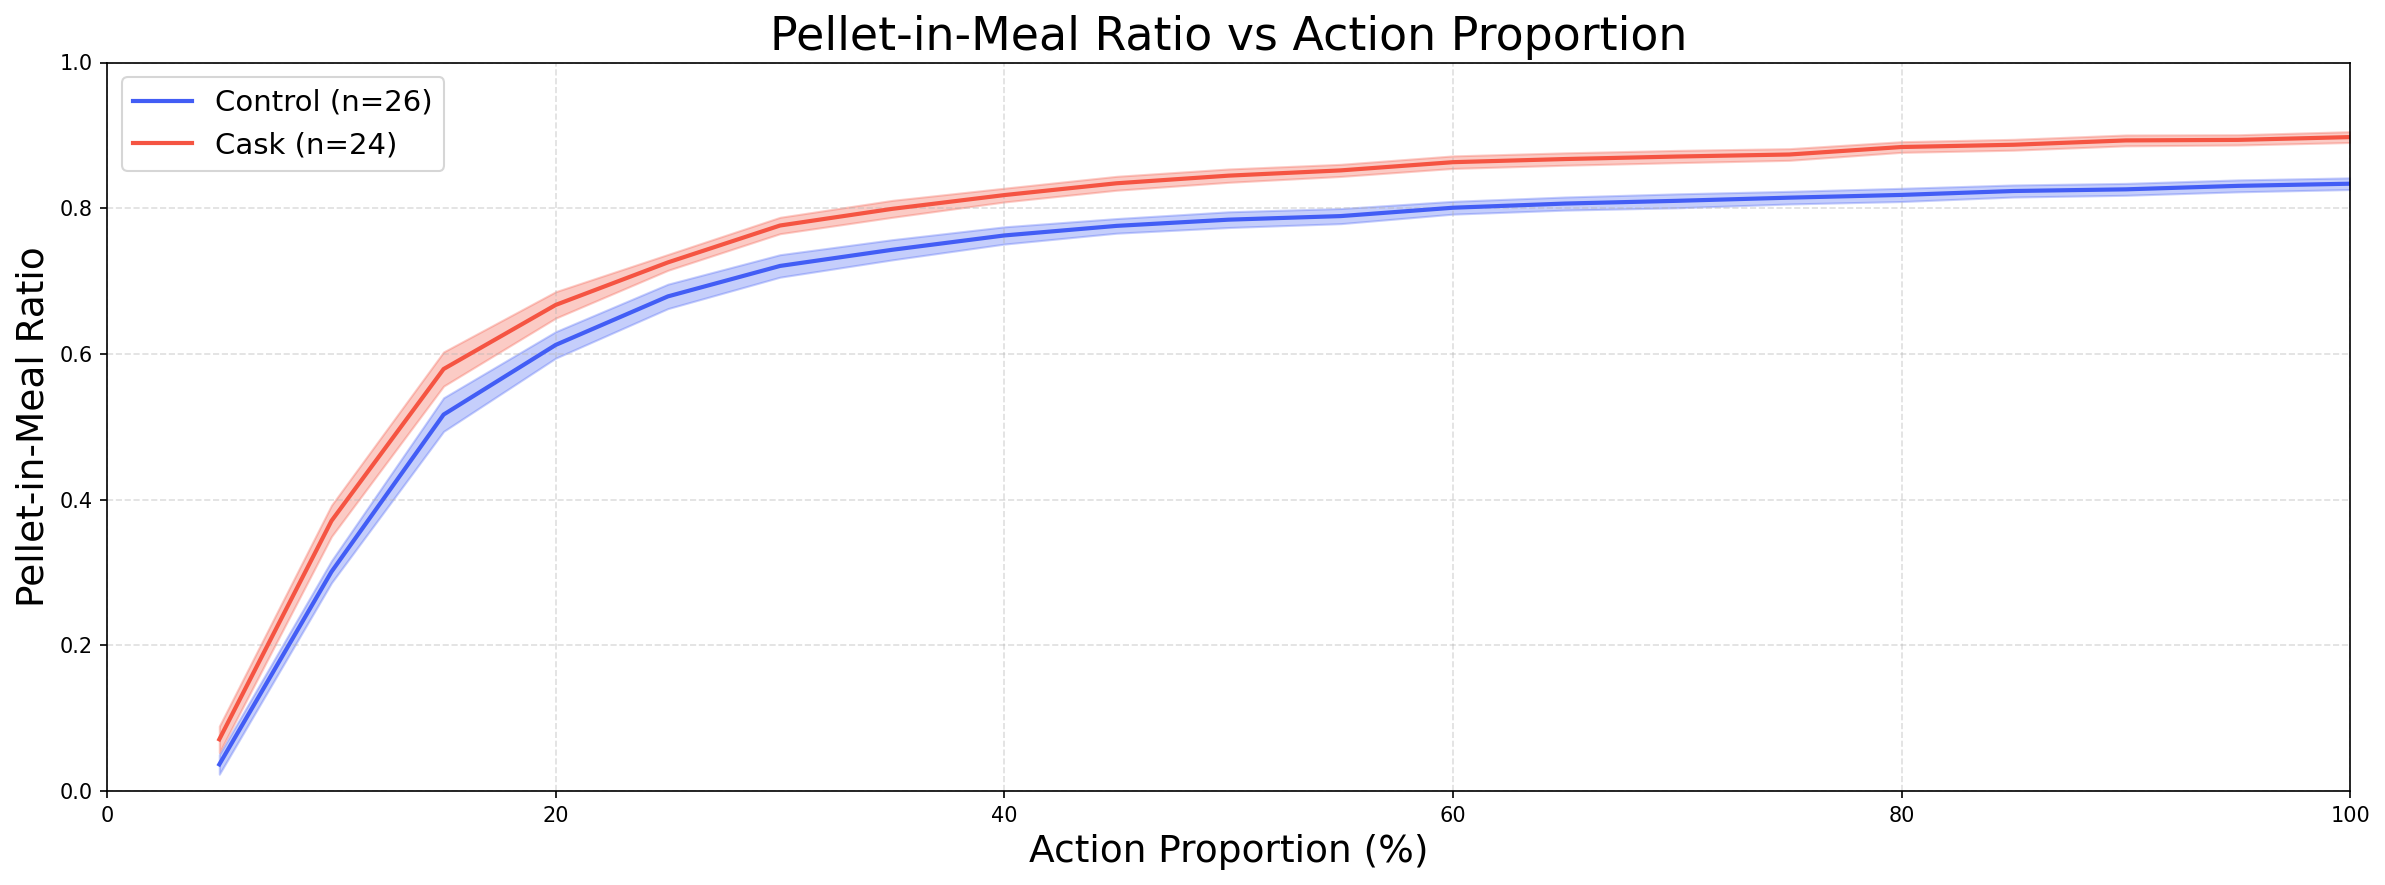

In [6]:
dit.plot_pellet_ratio_trend(
    blocks_groups=[ctrl_blocks_lists, cask_blocks_lists],
    group_labels=["Control", "Cask"],
    export_path="../export/Figure 3/CASK_pellet_in_meal_ratio.svg"
)

In [ ]:
perform_T_test(ctrl_scores, cask_scores, test_side='two-sided')

Ctrl Size: 26   Avg: 54.024   SE: 0.619
Cask  Size: 24   Avg: 52.512   SE: 0.734


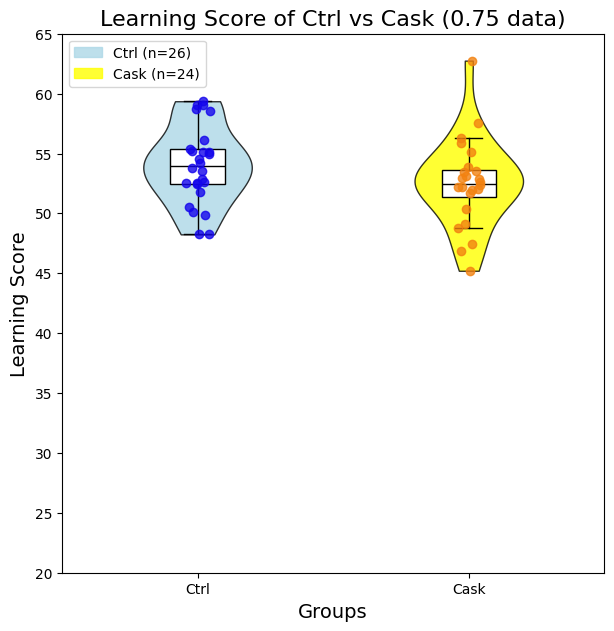

In [11]:
dit.graph_learning_score(ctrl_scores, cask_scores, group_names=['Ctrl', 'Cask'], proportion=action_prop, 
                         export_path=f'../export/Figure 3/CASK_{int(action_prop*100)}_learning_score.svg'
                         )

In [6]:
perform_T_test(ctrl_learning_result, cask_learning_result, test_side='two-sided')

P Value is  0.6008361929345695
There is no significant difference between the two groups.


Ctrl Size: 26   Avg: 72.403   SE: 0.760
Cask  Size: 24   Avg: 73.033   SE: 0.899


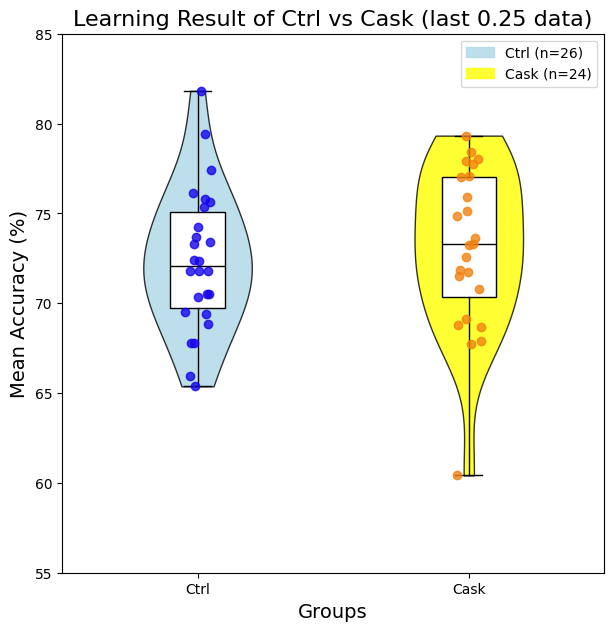

In [5]:
dit.graph_learning_results(ctrl_learning_result, cask_learning_result, proportion=0.25, group_names=['Ctrl', 'Cask'],
                            export_path='../export/Figure 3/CASK_learning_result.svg')

### Pellet Retrieval Analysis

In [25]:
export_root = '../export/Supplementary/'
os.makedirs(os.path.join(export_root, 'CASK_retrieval_time'), exist_ok=True)

ctrl_all_times, cask_all_times = [], []
ctrl_mean, cask_mean = [], []
ctrl_pred, cask_pred = [], []
ctrl_slope, cask_slope = [], []
rev_ctrl_time_dict, rev_cask_time_dict = {}, {}

In [ ]:
for sheet in rev_ctrl_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_ctrl_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_ctrl_path, sheet, day=day, n_stds=3,
                            export_path=os.path.join(export_root, 'CASK_retrieval_time', f'ctrl_{sheet}.svg')
                            )
    ctrl_all_times.append(times)
    ctrl_mean.append(mean)
    ctrl_pred.append(pred)
    ctrl_slope.append(slope)
    rev_ctrl_time_dict[sheet] = mean

In [ ]:
for sheet in rev_cask_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_cask_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_cask_path, sheet, day=day, n_stds=3, 
                    export_path=os.path.join(export_root, 'CASK_retrieval_time', f'cask_{sheet}.svg'),
                    )

    cask_all_times.append(times)
    cask_mean.append(mean)
    cask_pred.append(pred)
    cask_slope.append(slope)
    rev_cask_time_dict[sheet] = mean

In [ ]:
print(np.mean(ctrl_mean), np.std(ctrl_mean))
print(np.mean(cask_mean), np.std(cask_mean))

In [30]:
ctrl_mean.remove(max(ctrl_mean))
ctrl_mean.remove(max(ctrl_mean))
cask_mean.remove(max(cask_mean))

In [ ]:
graph_group_stats(ctrl_mean, cask_mean, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_mean.svg'))

In [ ]:
perform_T_test(ctrl_mean, cask_mean, test_side='two-sided')

In [ ]:
perform_T_test(ctrl_slope, cask_slope, test_side='two-sided')

In [ ]:
perform_T_test(ctrl_pred, cask_pred, test_side='two-sided')

In [ ]:
print(np.mean(ctrl_pred) + 3*np.std(ctrl_pred), max(ctrl_pred))
print(np.mean(cask_pred) + 3*np.std(cask_pred), max(cask_pred))

In [37]:
ctrl_pred.remove(max(ctrl_pred))
ctrl_pred.remove(max(ctrl_pred))
cask_pred.remove(max(cask_pred))

In [ ]:
graph_group_stats(ctrl_pred, cask_pred, 'Predicted Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_pred.svg'))

In [ ]:
graph_group_stats(ctrl_slope, cask_slope, 'Retrieval Time Best-fit Line Slope', group_names=['Ctrl', 'CASK'], unit='', 
                  export_path=os.path.join(export_root, 'cask_retrieval_slope.svg'))

In [40]:
ctrl_all_times, cask_all_times = [], []
ctrl_means, cask_means = [], []
ctrl_stds, cask_stds = [], []
fr1_ctrl_dict, fr1_cask_dict = {}, {}

for sheet in fr1_ctrl_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_ctrl_path, sheet, remove_outlier=True, n_stds=2, day=3)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)
    fr1_ctrl_dict[sheet] = mean

for sheet in fr1_cask_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_cask_path, sheet, remove_outlier=True, n_stds=2, day=3)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)
    fr1_cask_dict[sheet] = mean

In [ ]:
graph_group_stats(ctrl_means, cask_means, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join('../export/Figure 2/', 'cask_fr1_retrieval_mean.svg'))

In [ ]:
perform_T_test(ctrl_means, cask_means, test_side='two-sided')

In [ ]:
perform_T_test(ctrl_stds, cask_stds, test_side='two-sided')